![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

# Parte 1: Iteração de Rayleigh

Vimos que podemos iterar um vetor $v$ pela matriz $A$, obtendo a sequência de vetores $A^nv$, por multiplicações sucessivas, e que isso permite encontrar um autovetor.

## Questão 1

Implemente uma função `itera(A,v,tol,maxiter)` que itera o vetor $v$, normalizando a cada iteração.

O método para quando o relativo entre $Av_k$ e $\lambda_k v_k$ for menor do que `tol`,
ou após realizar `maxiter` iterações.

A função retorna `(vs, ls)`, respectivamente:
- as estimativas do autovetor (com norma 1);
- as estimativas correspondentes para o autovalor.

In [2]:
def itera(A,v, tol=1e-6, maxiter=1000):
    v = np.asarray(v)
    A = np.asarray(A)
    n,m = np.shape(A)
    ls = []
    vs = []
    assert n==m, 'A must be square'
    v /= norm(v)
    for _ in range(maxiter):
        v = A@v
        v /= norm(v)
        vs.append(v)
        vec = np.dot(v,A@v)
        ls.append(vec)
        erro_rel = norm((A@v)/vec - v)
        if (erro_rel <= tol):
            break
    return vs,ls

In [3]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2])

assert(abs(ls[-1] - 3) < 1e-6)
assert(all(abs(vs[-1] - alvo) < 1e-6))
assert(10 < len(ls) < 20)

In [4]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2], tol=1e-12)

assert(abs(ls[-1] - 3) < 1e-12)
assert(all(abs(vs[-1] - alvo) < 1e-12))
assert(20 < len(ls) < 30)

## Questão 2: Convergência

Vejamos como o algoritmo "converge" para o autovetor.
Use os vetores intermediários e faça um gráfico da evolução do erro entre os $v$'s produzidos e o autovetor $v_\lambda$.

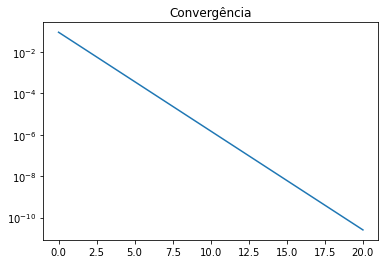

In [5]:
ax = None
vs, ls = itera(A, np.random.rand(2), tol=1e-10)
vs = np.asarray(vs)
ls = np.asarray(ls)
alvo = np.array([1,1])/np.sqrt(2)
erros = [norm(v -alvo) for v in vs]
plt.title('Convergência')
plt.semilogy(erros)
ax = plt.gca()
plt.show()

In [6]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()

assert 1e-12 < min(ys) < 1e-10
assert np.all(ys[:-1] > ys[1:])

O que o último assert quer dizer?

Ele quer verificar que o nosso erro é sempre decrescente, ele garante que todo valor do array é menor que seu valor anterior.

## Questão 3: Convergência comparada

Para cada um dos vetores `d1` e `d2` abaixo, considere a matriz $A = \operatorname{diag}(d_i)$ correspondente.

In [7]:
d1 = [1,10,20,30,31,32]
d2 = [1,10,20,29,30,32]

Qual é o autovetor com o maior autovalor para $A_1$ e $A_2$?

Sabemos que para matrizes diagonais, os elementos são os autovalores. Sendo assim, o maior autovalor de $d1$ é 32 e de $d2$ é 32.

E assim, o maior autovetor ligado a eles será o [0,0,0,0,0,1]

Agora, compare a velocidade de convergência do autovetor usando `itera` para cada uma destas matrizes,
fazendo o gráfico do erro entre os vetores gerados para $A_1$ e $A_2$ no mesmo eixo.

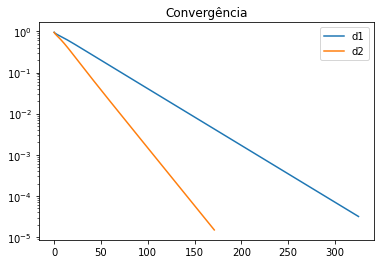

In [8]:
ax = None

vs_1, _ = itera(np.diag(d1), np.ones(6))
vs_2, _ = itera(np.diag(d2), np.ones(6))

vs = np.asarray(vs)
ls = np.asarray(ls)
alvo = [0,0,0,0,0,1]

erros1 = [norm(v - alvo) for v in vs_1]
erros2 = [norm(v - alvo) for v in vs_2]

plt.title('Convergência')
plt.semilogy(erros1, label = 'd1')
plt.semilogy(erros2, label = 'd2')
plt.legend()
ax = plt.gca()
plt.show()

In [9]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Para qual matriz há convergência mais rápida?  Como você explicaria isso?

Para A2, podemos explicar isso pela distância dos valores de D até o maior autovalor, quanto mais próximos os valores forem do maior autovalor, mais irá demorar pro algoritmo convergir.

## Questão 4: Convergência?

Sejam $\theta \in [0,2\pi]$ e $\alpha \in \mathbb{R}$,
e considere a matriz 
$$A(\theta, \alpha) = \begin{bmatrix} 
\cos(\theta) & \sin(\theta) & 0\\
-\sin(\theta) &\cos(\theta) &  0\\
0 & 0 & \alpha\\
\end{bmatrix}.$$

Qual a interpretação geométrica dessa matriz?

Esta é a rotação de matriz em torno do eixo Z por um ângulo teta e z escalado pelo fator alfa
.

Quais são os autovetores de $A$ (em função de $\theta$ e $\alpha$)?

YOUR ANSWER HERE

Implemente a função abaixo que gera a matriz $A$:

In [26]:
def make_matrix(a,b):
    matriz = []
    matriz.append([np.cos(a), np.sin(a),0])
    matriz.append([-np.sin(a), np.cos(a),0])
    matriz.append([0, 0,b])
    return matriz

In [28]:
assert np.allclose(make_matrix(0,1),np.eye(3))
assert np.allclose(make_matrix(np.pi,0.5),[[-1,0,0],[0,-1,0],[0,0,0.5]])

Fixando $\theta = \dfrac{\pi}{4}$,
faça um gráfico do número de iterações necessários para calcular o maior autovetor,
em função de $\alpha \in [0.5,1.5]$, com precisão `1e-12`.

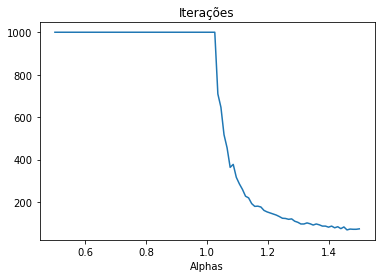

In [34]:
alphas = np.linspace(0.5,1.5,100)
ax = None

iter = []
for a in alphas:
    matriz = make_matrix(np.pi/4,a) 
    vs, ls = itera(matriz,np.random.rand(3), tol=1e-12, maxiter=1000)
    iter.append(len(vs))
plt.plot(alphas,iter)
plt.xlabel('Alphas')
plt.title('Autovetores')
ax = plt.gca()
plt.show()

In [35]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert 100 > ys.min() > 60
assert ys[55] < 600
assert ys[50] > 900

Agora, faça o gráfico com a estimativa do autovalor, novamente em função de $\alpha$.

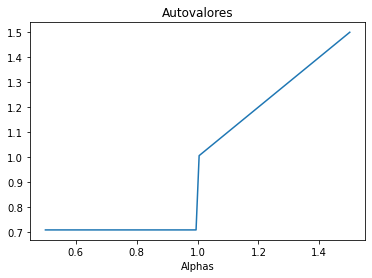

In [43]:
alphas = np.linspace(0.5,1.5,100)
ax = None

iter = []
for a in alphas:
    matriz = make_matrix(np.pi/4,a) 
    vs, ls = itera(matriz,np.random.rand(3), tol=1e-12, maxiter=1000)
    iter.append(ls[-1])
plt.plot(alphas,iter)
plt.xlabel('Alphas')
plt.title('Autovalores')
ax = plt.gca()
plt.show()

In [42]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert np.all(0.7 <= ys) and np.all(ys <= 1.5)

Como explicar a variação no número de iterações? O que isso tem a ver com o autovalor retornado?

Pois quando os alphas for menor que 1, teremos autovalores complexos, que não serão computadores pela tolerância, e o algoritmo irá parar por conta das iterações. Após isso, passamos a lidar com valores reais que são possíveis de serem calculados.

# Questão 5: Autovalores negativos

Em princípio, tudo deveria funcionar de forma muito similar para autovalores **negativos**.

Estude o caso $\alpha \in [-1.5, -0.5]$, fazendo os dois gráficos lado a lado.

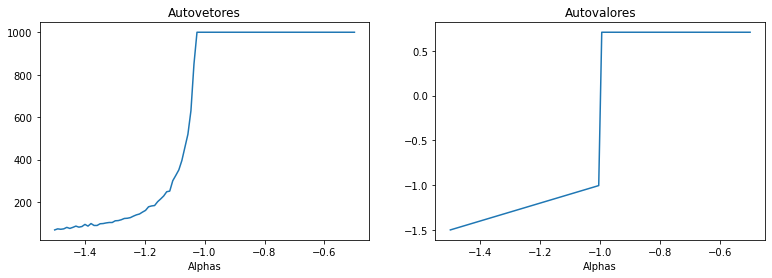

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
negalphas = np.linspace(-1.5, -0.5, 100)

ax = None

iter1 = []
iter2 = []
for a in negalphas:
    matriz = make_matrix(np.pi/4,a) 
    vs, ls = itera(matriz,np.random.rand(3), tol=1e-12, maxiter=1000)
    iter1.append(len(vs))
    iter2.append(ls[-1])
ax1.plot(negalphas,iter1)
ax2.plot(negalphas,iter2)
ax1.set_xlabel('Alphas')
ax1.set_title('Autovetores')
ax2.set_xlabel('Alphas')
ax2.title('Autovalores')
ax = plt.gca()
plt.show()

In [58]:
len(ys1)

100

In [48]:
assert ax1.title.get_text() != ""
assert len(ax1.lines) == 1
assert ax1.get_xlabel() != ""

ys1 = ax1.lines[0].get_ydata()

assert 100 > ys1.min() > 60
assert ys1[44] < 600
assert ys1[49] > 900


assert ax2.title.get_text() != ""
assert len(ax2.lines) == 1
assert ax2.get_xlabel() != ""

ys2 = ax2.lines[0].get_ydata()

assert np.all(0.71 >= ys2)
assert np.all(ys2 >= -1.5)

Para funcionar, o teste `ys1[i] < 600` teve seu índice foi trocado de `55` para `44`.
Explique esta mudança, tanto do ponto de vista matemático,
quanto da linguagem Python. 

Como agora invertemos o gráfico, e estamos "andando" do menor autovetor para o maior, precisamos tambem inverter o caminho que usávamos.

Se antes precisávamos de 56 números para ir do maior autovalor até o menor, precisaremos de 45 para ir do menor até o maior.

(100 - 56) = 44

Explique, também, porque $0.71$ deve ser suficiente como cota superior. (Aqui, é "só" matemática, mas a matemática pode ser um pouco mais complexa)

YOUR ANSWER HERE

# Questão 6: Mudando $\theta$

A velocidade de convergência muda ao trocar $\theta$?
Teste outros valores, e refaça os gráficos, agora com várias curvas em cada eixo,
uma para cada um dos valores de $\theta$ que você estudou.

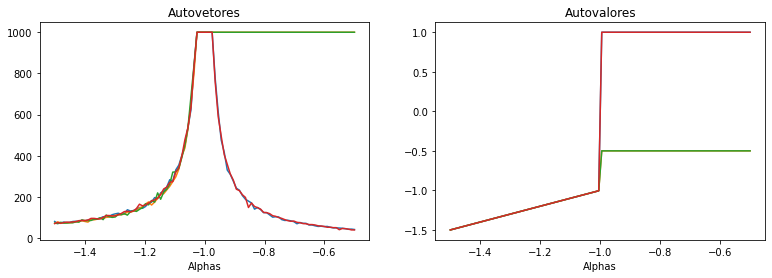

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))


alphas = np.linspace(0.5, 1.5, 100)

tethas = np.linspace(0, 2*np.pi, 4)

ax = None



for tetha in tethas:
    iter1 = []
    iter2 = []
    for a in negalphas:
        matriz = make_matrix(tetha,a) 
        vs, ls = itera(matriz,np.random.rand(3), tol=1e-12, maxiter=1000)
        iter1.append(len(vs))
        iter2.append(ls[-1])
    ax1.plot(negalphas,iter1)
    ax2.plot(negalphas,iter2)
ax1.set_xlabel('Alphas')
ax1.set_title('Autovetores')
ax2.set_xlabel('Alphas')
ax2.set_title('Autovalores')
ax = plt.gca()
plt.show()

O que você observa?  Isso faz sentido?

É possivel obserbar que grande maioria dos valores de tetha seguem o mesmo padrão para os autovetores enquanto diferem para os autovalores.

E é possivel perceber que quando theta = pi, os valores tratados serão somente valores reais, pois nas equações que temos números irracionais, a parte imaginaria será igual a 0 por ela estar ligada a sen(theta), e sen(pi) = 0.